In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df['gender'].unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [17]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [18]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [20]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [21]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [22]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [23]:
numeric_features

['math score', 'reading score', 'writing score']

In [25]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [26]:
df['total score']=df['math score']+df['writing score']+df['reading score']
df['average']=df['total score']/3

In [27]:
df['total score'].head()

0    218
1    247
2    278
3    148
4    229
Name: total score, dtype: int64

In [31]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

In [32]:
reading_full

17

In [33]:
writing_full

14

In [34]:
math_full

7

In [35]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

In [36]:
reading_less_20

1

In [37]:
writing_less_20

3

In [38]:
math_less_20

4

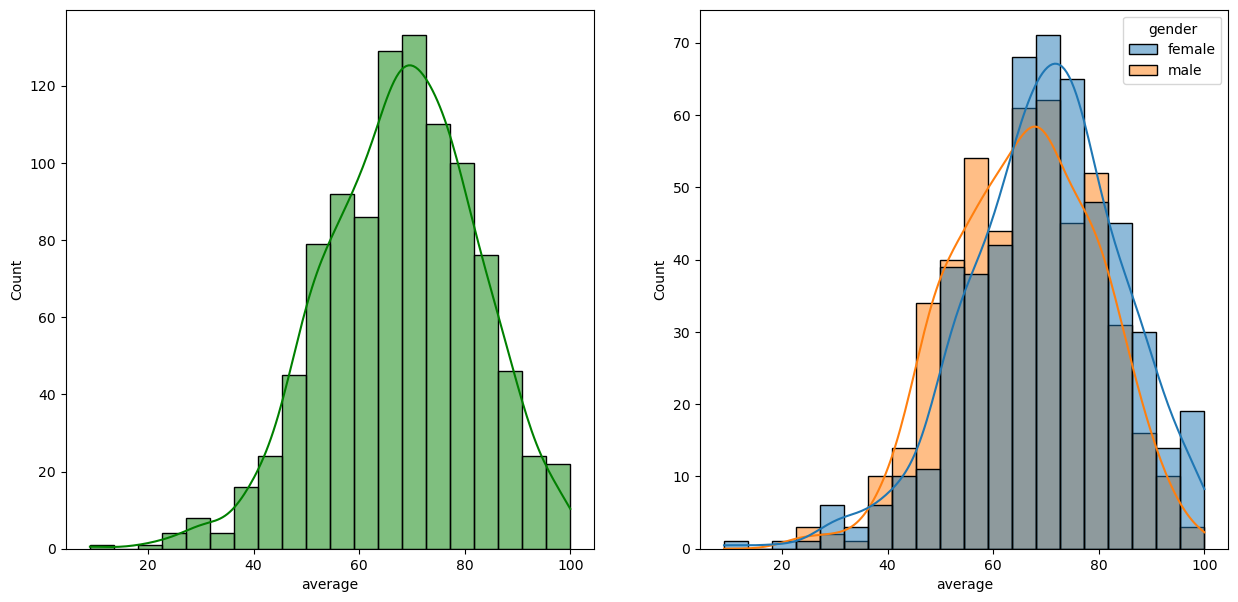

In [40]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='gender')
plt.show()

